In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
import time
from collections import Counter
from mnist import MNIST
%matplotlib inline

In [18]:
# Read in mnist data
mndata = MNIST()

In [19]:
# Get images
mnist_images , mnist_labels = mndata.load_testing()

In [20]:
# Making a dataframe to visualize data
mnist_df = pd.DataFrame(mnist_images)

In [22]:
mnist_df.insert(loc=0, column='label', value = mnist_labels)

In [23]:
mnist_df

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Separate Image pixel values/labels
images = mnist_df.iloc[0:5000,1:]
labels = mnist_df.iloc[0:5000,:1]

In [25]:
images

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
labels

,label
0,7
1,2
2,1
3,0
4,4
5,1
6,4
7,9
8,5
9,9


In [27]:
# Train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state = 0)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
train_images.shape

(4000, 784)

In [29]:
test_images.shape

(1000, 784)

In [31]:
train_labels.shape

(4000, 1)

In [32]:
test_labels.shape

(1000, 1)

In [33]:
test_images_np_arr = test_images.as_matrix()

In [34]:
train_images_np_arr = train_images.as_matrix()

In [35]:
train_labels_np_arr = train_labels.as_matrix()

## KNN

In [36]:
#Set batch size
batch_size = 50
num_test = test_images.shape[0]
predictions = []

In [41]:
for i in range(int(num_test/batch_size)):
    print("computing batch " +str(i+1)+"/"+str(num_test/batch_size))
    tic = time.time()
    test_to_pred = test_images_np_arr[i*batch_size:(i+1)*batch_size]
    dot_prod = np.dot(test_to_pred, train_images_np_arr.T)
    
    sum_square_test = np.square(test_to_pred).sum(axis=1)
    sum_square_train = np.square(train_images_np_arr).sum(axis=1)
    
    dists = np.sqrt(-2*dot_prod + sum_square_train + np.matrix(sum_square_test).T)
    
    num_distances = dists.shape[0]
    
    label_prediction = np.zeros(num_distances)
    
    for j in range(num_distances):
        k_closest_y = []
        found_labels = train_labels_np_arr[np.argsort(dists[j,:])].flatten()
        k_closest_y = found_labels[:3]
        # k = 3
        # Count number of unique labels
        c = Counter(k_closest_y)
        label_prediction[j] = c.most_common(1)[0][0]
    predictions = predictions + list(label_prediction)
    # end recording time
    toc = time.time()
    print("completed batch in " +str(toc-tic)+ " seconds")

computing batch 1/20.0
completed batch in 2.8095743656158447seconds
computing batch 2/20.0
completed batch in 2.7972371578216553seconds
computing batch 3/20.0
completed batch in 2.7876675128936768seconds
computing batch 4/20.0
completed batch in 2.7895400524139404seconds
computing batch 5/20.0
completed batch in 2.7886276245117188seconds
computing batch 6/20.0
completed batch in 2.8613154888153076seconds
computing batch 7/20.0
completed batch in 2.7882518768310547seconds
computing batch 8/20.0
completed batch in 2.7770495414733887seconds
computing batch 9/20.0
completed batch in 2.7858386039733887seconds
computing batch 10/20.0
completed batch in 2.815624952316284seconds
computing batch 11/20.0
completed batch in 2.8383805751800537seconds
computing batch 12/20.0
completed batch in 2.7876999378204346seconds
computing batch 13/20.0
completed batch in 2.8107972145080566seconds
computing batch 14/20.0
completed batch in 2.7967188358306885seconds
computing batch 15/20.0
completed batch in 2

In [42]:
predictions

[4.0,
 8.0,
 3.0,
 8.0,
 7.0,
 5.0,
 6.0,
 3.0,
 0.0,
 4.0,
 0.0,
 0.0,
 9.0,
 5.0,
 9.0,
 0.0,
 5.0,
 1.0,
 4.0,
 6.0,
 4.0,
 7.0,
 3.0,
 4.0,
 2.0,
 3.0,
 7.0,
 4.0,
 9.0,
 3.0,
 1.0,
 9.0,
 8.0,
 5.0,
 2.0,
 6.0,
 1.0,
 7.0,
 3.0,
 9.0,
 8.0,
 8.0,
 1.0,
 4.0,
 0.0,
 8.0,
 1.0,
 7.0,
 4.0,
 7.0,
 6.0,
 3.0,
 8.0,
 2.0,
 7.0,
 2.0,
 4.0,
 5.0,
 8.0,
 6.0,
 8.0,
 3.0,
 8.0,
 2.0,
 6.0,
 7.0,
 7.0,
 6.0,
 8.0,
 7.0,
 7.0,
 7.0,
 9.0,
 2.0,
 0.0,
 5.0,
 2.0,
 6.0,
 1.0,
 6.0,
 4.0,
 4.0,
 3.0,
 4.0,
 9.0,
 6.0,
 3.0,
 1.0,
 2.0,
 8.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 9.0,
 5.0,
 7.0,
 6.0,
 1.0,
 1.0,
 0.0,
 6.0,
 7.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 9.0,
 9.0,
 7.0,
 1.0,
 6.0,
 7.0,
 5.0,
 3.0,
 8.0,
 3.0,
 1.0,
 5.0,
 8.0,
 0.0,
 4.0,
 6.0,
 9.0,
 6.0,
 0.0,
 1.0,
 9.0,
 8.0,
 0.0,
 0.0,
 8.0,
 0.0,
 6.0,
 7.0,
 1.0,
 4.0,
 9.0,
 3.0,
 6.0,
 7.0,
 0.0,
 8.0,
 3.0,
 1.0,
 4.0,
 3.0,
 4.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 4.0,
 3.0,
 2.0,
 5.0,
 5.0,
 7.0,
 9.0,
 9.0,
 2.0

In [43]:
pred_np_arr = np.asarray(predictions)

In [44]:
correct = 0
counter = 0
for index, row in test_labels.iterrows():
    observed_val = int(row['label'])
    if(observed_val == pred_np_arr[counter]):
        correct += 1
    counter += 1

In [45]:
float(correct)/1000

0.932

## SVM

Text(0.5,1,'6')

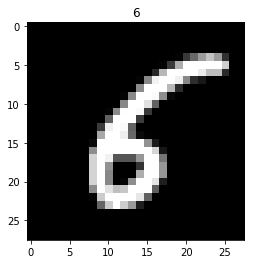

In [47]:
i = 3
img = train_images.iloc[i].as_matrix()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i,0])

In [48]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.11899999999999999

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

Text(0.5,1,'label    6\nName: 217, dtype: int32')

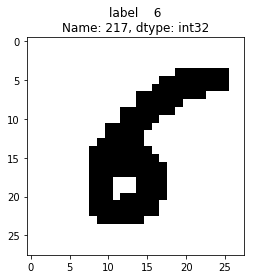

In [50]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img = train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img, cmap = 'binary')
plt.title(train_labels.iloc[i])

In [51]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.90100000000000002